# Проект: Исследование стартапов

Автор: Столярова Оксана

Дата: 31.01.2025

### Цели и задачи проекта

**Цель:** Подготовить исходные данные о компаниях-стартапах, проверить корректность представленных даннных и их пригодность для анализа, по возможности выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

**Задачи:**
- подготовить данные к анализу;
- определить столбцы, по которым можно объединять данные из разных таблиц;
- проверить корректность и пригодность для анализа данных о сотрудниках стартапов и их образовании;
- вяснить, что значат покупки за 0 или за 1 доллар;
- определить цену в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- определить, как рассчитать и отобразить численные показатели и динамику;
- выявить показатели и признаки, указывающие на повышенную вероятность успешной сделки по покупке компании.


### Описание данных

*Для анализа доступны данные датасетов:*

- acquisition.csv
- company_and_rounds.csv
- degrees.csv
- education.csv
- fund.csv
- investment.csv
- people.csv

Таблица **acquisition** содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

Таблица **company_and_rounds** содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата основания.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

Таблица **education** содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

Таблица **people** содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

Таблица **degrees** сдержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

<a id=intro></a>
## Содержание:

1. [Знакомство с данными: загрузка и первичная предобработка](#1)

2. [Предобработка данных, предварительное исследование](#2)

3. [Исследовательский анализ объединённых таблиц](#3)

4. [Итоговый вывод и рекомендации](#4)


## 1. Знакомство с данными: загрузка и первичная предобработка<a id='1'></a>


### 1.1. Вывод общей информации, исправление названия столбцов

Загрузим необходимые библиотеки и датасеты. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгружаем данные
acquisition = pd.read_csv("/datasets/acquisition.csv")
company_and_rounds = pd.read_csv("/datasets/company_and_rounds.csv")
degrees = pd.read_csv("/datasets/degrees.csv")
education = pd.read_csv("/datasets/education.csv")
fund = pd.read_csv("/datasets/fund.csv")
investment = pd.read_csv("/datasets/investment.csv")
people = pd.read_csv("/datasets/people.csv")


**Познакомимся с данными датасетов с помощью методов head() и  info().**

In [3]:
# Проверяем таблицу acquisition:
display(acquisition.head())
display(acquisition.info())

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

Датасет **acquisition.csv** содержит 5 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний. После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Столбцы id, acquiring_company_id, acquired_company_id, price_amount имеют целочисленный тип данных int64
- Столбцы term_code, acquired_at  имеют тип данных object. 
- Столбец acquired_at содержит информацию о дате сделки, значит его формат надо будет преобразовать к типу datetime64.
- Пропуски содержатся в столбцах term_code и acquired_at.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [4]:
# Проверяем таблицу company_and_rounds:
display(company_and_rounds.head())
display(company_and_rounds.info())

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

Датасет **company_and_rounds.csv** содержит 22 столбца и 217774 строки, в которых представлена информация о компаниях и раундах финансирования. После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов не соответсвуют формату snake case. При этом присутсвуют 2 столбца с практически идентичными названиями содержащие информацию об id компании, их содержание необходимо будет проверить и выяснить дублируется ли информация.
- Столбцы company  ID, investment  rounds, funding  rounds, funding  total, milestones, funding  round  id, company  id, raised  amount, pre  money  valuation, participants, is  first  round, is  last  round имеют тип данных float64. Для этих данных оптимальнеее был бы целочисленный тип данных, но в текущем состоянии преобразовать в этот тип нельзя из-за пропусков данных.
- Столбцы name, category  code, status, founded  at, closed  at, domain, network  username, country  code, funded  at, funding  round  type  имеют тип данных object. 
- Столбец founded  at, closed  at, funded  at содержат информацию о дате, значит его формат надо будет преобразовать к типу datetime64.
- Пропуски содержатся во всех столбцах.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [5]:
# Проверяем таблицу people:
display(people.head())
display(people.info())

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

Датасет **people.csv** содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках. После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Столбец id имеет целочисленный тип данных int64.
- Столбцы first_name, last_name, company_id, network_username имеют тип данных object. 
- Столбец company_id имеет тип данных float64. Здесь более корректным был бы целочисленный тип, но скорректировать его можно будет только после обработки пропусков.
- Пропуски содержатся во всех столбцах, кроме id.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [6]:
# Проверяем таблицу degrees:
display(degrees.head())
display(degrees.info())

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

Датасет **degrees.csv** содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника. После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Столбец id имеет целочисленный тип данных int64.
- Столбцы object_id, degree_type, subject  имеют тип данных object. 
- Пропуски содержатся в столбцах degree_type, subject.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [7]:
# Проверяем таблицу education:
display(education.head())
display(education.info())

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

Датасет **education.csv** содержит 4 столбца и 109610 строк, в которых представлена информация  об образовании сотрудника. После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Столбцы id и person_id имеют целочисленный тип данных int64
- Столбцы instituition и graduated_at  имеют тип данных object. 
- Столбец graduated_at содержит информацию о дате получения образования, значит его формат надо будет преобразовать к типу datetime64.
- Пропуски содержатся в столбцах instituition и graduated_at.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [8]:
# Проверяем таблицу fund:
display(fund.head())
display(fund.info())

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


None

Датасет **fund.csv** содержит 9 столбцов и 11651 строк, в которых представлена информация  о фондах. После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Столбцы id, investment_rounds, invested_companies, milestones  имеют целочисленный тип данных int64
- Столбцы name, founded_at, domain, network_username, country_code имеют тип данных object. 
- Столбец founded_at содержит информацию о создания фонда, значит его формат корректнее будет преобразовать к типу datetime64.
- Пропуски содержатся во всех столбцах с типом object: name, founded_at, domain, network_username, country_code.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [9]:
# Проверяем таблицу investment:
display(investment.head())
display(investment.info())

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


None

Датасет **investment.csv** содержит 4 столбца и 61402 строк, в которых представлена информация о раундах инвестирования. После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Все столбцы имеют целочисленный тип данных int64.
- Пропусков нет.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

**Предварительные итоги знакомства с данными:**
- Названия столбцов в большинстве таблиц имеет корректный формат snake case, переименования требуют столбцы только в таблице company_and_rounds;
- Также в таблице company_and_rounds следует проверить столбцы company  ID и company  id на дублирование информации, удалить лишний столбец в случае подтверждения дублирования.
- Столбцы с информацией о датах в таблицах  acquisition, company_and_rounds, education и fund (если мы решим, что будем использовать ее в исследовании) необходимо привести к типу datetime64.
- Практически во всех таблицах содержаться пропуски, необходимо их более детальное рассмотрение для принятия решения об их обработке.

[*К содержанию*](#intro) 

### 1.2. Смена типов и анализ пропусков

Проверим дублируется ли содержание столбцов  company ID и company id в таблице company_and_rounds. Уже по предварительной информации, полученной на предыдущем шаге, видно, что часть значений совпадает, а в столбце company id гораздо больше пропусков, значит наша задача - выяснить, совпадают ли значения в столбцах, где нет пропусков, и посмотреть на строки по столбцу company ID, где есть пропуски, на предмет наличия значений в столбце company id.

In [10]:
# Создадим врмененую таблицу для проверки нашей гипотезы
df = company_and_rounds[["company  ID", "company  id"]].copy()
# Создадим новый столбцец, как разницу значений столбцов  company ID и company id.
# Если значения идентичны, то получим значение 0, если нет - то иное численное значение.
# Если хотя бы одном столбце есть пропуск, то получиим тоже пропуск.
df["new_id"] = df["company  ID"] - df["company  id"]
# Выведем результат
display(df)
# Сгруппируем данные по новому столбцу, чтобы увидеть все возможные результаты и их количество.
df.groupby("new_id")["company  ID"].count()

,company ID,company id,new_id
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,10.0,NaN,NaN
4,100.0,NaN,NaN
...,...,...,...
217769,NaN,282847.0,NaN
217770,NaN,55477.0,NaN
217771,NaN,55477.0,NaN
217772,NaN,283492.0,NaN


new_id
0.0    52626
Name: company  ID, dtype: int64

Итак, мы можем увидеть, что в столбцах company ID и company id, где нет пропусков - абсолютно идентичные значения. При этом в сторках с пропусками по столбцу company ID встречаются значения в столбце company id. В описаннии данных была указана гипотеза, что данные по компаниям раньше хранились иначе, более удобным для исследования образом, возможно отсюда возникло дублирование информации.

Приведем названия столбцов в таблице company_and_rounds к стилю snake case

In [11]:
# Приведем названия столбцов в таблице company_and_rounds к стилю snake case с помощью метода rename
# столбец company id переименуем в company_id_old, исходя их нашей теории
rename_map = {
    "company  ID": "company_id",
    "category  code": "category_code",
    "founded  at": "founded_at",
    "closed  at": "closed_at",
    "network  username": "network_username",
    "country  code": "country_code",
    "investment  rounds": "investment_rounds",
    "funding  rounds": "funding_rounds",
    "funding  total": "funding_total",
    "funding  round  id": "funding_round_id",
    "company  id": "company_id_old",
    "funded  at": "funded_at",
    "funding  round  type": "funding_round_type",
    "raised  amount": "raised_amount",
    "pre  money  valuation": "pre_money_valuation",
    "is  first  round": "is_first_round",
    "is  last  round": "is_last_round",
}

company_and_rounds.rename(columns=rename_map, inplace=True)

# проверяем результат
company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_old', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Теперь приведем столбцы с датами к типу datetime64.

In [12]:
# Изменим тип данных в столбцах с датой в таблицах acquisition, company_and_rounds, education и fund.
acquisition["acquired_at"] = acquisition["acquired_at"].astype("datetime64")
company_and_rounds[["founded_at", "closed_at", "funded_at"]] = company_and_rounds[
 ["founded_at", "closed_at", "funded_at"]
].astype("datetime64")
education["graduated_at"] = education["graduated_at"].astype("datetime64")
fund["founded_at"] = fund["founded_at"].astype("datetime64")

# Проверяем результат
display(acquisition[["acquired_at"]].dtypes)
display(company_and_rounds[["founded_at", "closed_at", "funded_at"]].dtypes)
display(education[["graduated_at"]].dtypes)
display(fund[["founded_at"]].dtypes)

acquired_at    datetime64[ns]
dtype: object

founded_at    datetime64[ns]
closed_at     datetime64[ns]
funded_at     datetime64[ns]
dtype: object

graduated_at    datetime64[ns]
dtype: object

founded_at    datetime64[ns]
dtype: object

Теперь посмотрим на пропуски в 5 основных таблицах, необходимых для анализа, и оценим их количество.

In [13]:
# Напишем функцию для подсчета абсолютного и относительного количества пропусков
def isna_param(df):
    """
    Функция подсчитывает пропущенные значения в столбцах датафрейма
    в абсолютных и процентных значениях, сортируя их по убыванию. 
    Функция применяется к датафрейму
    """
    display(
        df.isna()
        .agg(["sum", "mean"])
        .T.sort_values(by="sum", ascending=False)
        .assign(mean=lambda x: (x["mean"] * 100).round(2))
        .rename(columns={"sum": "Пропущенные значения", "mean": "Доля (%)"})
    )

In [14]:
# Проверим пропуски в таблице acquisition
isna_param(acquisition)

,Пропущенные значения,Доля (%)
term_code,7576.0,80.54
acquired_at,29.0,0.31
id,0.0,0.00
acquiring_company_id,0.0,0.00
acquired_company_id,0.0,0.00
price_amount,0.0,0.00


Больше всего пропусков 80,5% в столбце с вариантом расчета, однако эти данные не нужны для ответов на поставленные задачи.
Пропусков в столбце acquired_at мало - всего 0.31%, при необходимости их можно будет удалить, не сильно исказив конечный результат.

In [15]:
# Проверим пропуски в таблице company_and_rounds
isna_param(company_and_rounds)

,Пропущенные значения,Доля (%)
closed_at,214325.0,98.42
funded_at,165094.0,75.81
is_last_round,164846.0,75.70
is_first_round,164846.0,75.70
participants,164846.0,75.70
pre_money_valuation,164846.0,75.70
raised_amount,164846.0,75.70
funding_round_type,164846.0,75.70
funding_round_id,164846.0,75.70
company_id_old,164846.0,75.70


В таблице выделяются **company_and_rounds** можно выделить 2 большие группы столбцов с одинаковым количеством пропусков. Первая группа: company_id, name, milestones, funding_rounds, investment_rounds, status, funding_total	имеет всего 302 пропуска или 0.14%. Вторая большая группа: funded_at, is_last_round, is_first_round, participants, pre_money_valuation, raised_amount, funding_round_type, funding_round_id, company_id_old иммет 165094 пропуска или 75,7%, а это уже более 3/4 всего датасета!
Самый большой процент пропусков в столбце closed_at	 - 98,42%. Но в неем отсутствие значений скорее всего говорит о том, что компания все еще работает, а не о пропуске данных.
В остальных же столбцах network_username, country_code, founded_at, category_code, domain пропуски варьируются, но в них не содержится информация, необходимая для решения поставленных задач.
Таким образом, можно предположить, что одинаковое количество пропусков в двух больших группах столбцов, является результатом объединения информации из двух разных источников. Поэтому удалять строки с пропусками из данного датасета нельзя, т.к. потеряются важные данные. Зато можно будет поделить датасет на 2 по вышеописанному принципу и анализировать каждый из них в зависмости от поставленных задач.<a id='5'></a>

In [16]:
# Проверим пропуски в таблице people
isna_param(people)

,Пропущенные значения,Доля (%)
company_id,192094.0,84.73
network_username,187842.0,82.86
first_name,5.0,0.00
last_name,1.0,0.00
id,0.0,0.00


Нет пропусков тольков  столбце с id сотрудника, крайне незначительное количество в столбцах с именем и фамилией, а вот столбцы с ником в соцсетях и id компании имеют более 80%.

In [17]:
# Проверим пропуски в таблице education
isna_param(education)

,Пропущенные значения,Доля (%)
graduated_at,51556.0,47.04
instituition,55.0,0.05
id,0.0,0.00
person_id,0.0,0.00


Пропусков в столбце instituition менее 1%, что не критично, в столбце graduated_at- почти половина. Возможно это говорит о том, что человек еще не закончил свое обучение.

In [18]:
# Проверим пропуски в таблице degrees
isna_param(degrees)

,Пропущенные значения,Доля (%)
subject,28312.0,25.83
degree_type,11218.0,10.23
id,0.0,0.00
object_id,0.0,0.00


Пропуски отсутствуют в столбцах с id записи и сотрудника, 10.23% в столбце с типом образования и 26.83% - со специальностью, но данные из этого столбца не критичны для решения поставленных задач.

Таким образом, количество пропусков в интересущих нас данных составляет большую часть датасетов. Решение поставленных задач возможно лишь на небольшом проценте данных. Только для 24% от общего числа записей есть инфрмация о раундах финансирования, и для 15% сотрудников - информация о привязке к конкретной компании.

[*К содержанию*](#intro) 

## 2. Предобработка данных, предварительное исследование<a id='2'></a>


### 2.1. Раунды финансирования по годам

Создадим сводную таблицу на основе датасета company_and_rounds.csv, в которой за каждый год будет отображаться типичный размер средств, выделяемый в рамках одного раунда и общее количество раундов финансирования. Будем рассматривать годы с информацией о более, чем 50 раундах финансирования. Для этого выделим из данных о дате финансирования по столбцу funded_at значение года и сформируем сводную таблицу по заданным параметрам.

In [19]:
# Выделим год из столбца funded_at с помощью акцессора .dt и атрибута year
company_and_rounds["funded_year"] = company_and_rounds["funded_at"].dt.year.astype(
    "Int64", errors="ignore"
)

# Создадим сводную таблицу по годам финансирования с медианой и количеством вхождений по столбцу raised_amount
pivot_funded = company_and_rounds.pivot_table(
    values="raised_amount", index="funded_year", aggfunc=["median", "count"]
)

# переименуем столбцы таблицы:
columns_names = ["median_amount_for_round", "rounds_count"]
pivot_funded.columns = columns_names

# Отфильтруем сводную таблицу по количеству раундов финансирования более 50
filt_pivot_funded = pivot_funded[pivot_funded["rounds_count"] > 50].copy()

display(filt_pivot_funded)

,median_amount_for_round,rounds_count
funded_year,,
1999,2000000.0,76
2000,4200000.0,125
2001,3000000.0,96
2002,4200000.0,116
2003,3000000.0,159
2004,5000000.0,291
2005,5500000.0,1633
2006,5000000.0,2436
2007,3973320.0,3279


Итак, мы видим, что финансирование стартапов, с 1999г, когда был превышен порог в 50 раундов,  начинает уверенно развиваться и уже к 2013г. мы видим количество более 11 тыс. за год. Теперь для лучшего восприятия сделаем визуализацию, отражающую динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

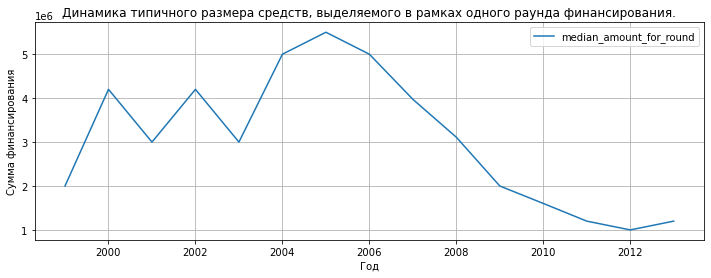

In [20]:
# Сбрасываем индексы у сводной таблицы
median_amount = filt_pivot_funded.reset_index()

# Строим линейный график
median_amount.plot(
    kind="line",
    x="funded_year",
    y="median_amount_for_round",
    title="Динамика типичного размера средств, выделяемого в рамках одного раунда финансирования.",
    figsize=(12, 4),
)

# Подписываем и отображаем график
plt.xlabel("Год")
plt.ylabel("Сумма финансирования")
plt.grid()
plt.show()

По грфику видно, что типичный размер собранных в рамках одного раунда средств достиг своего пика в 2005г, после этого типичный размер финансирования в рамках раунда уменьшался с каждым годом и достиг минимума в 2012г.

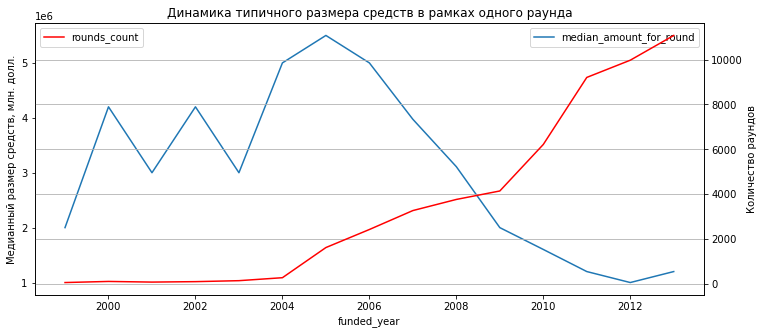

In [21]:
#Добавим на наш график линию, визуализирующую динамику числа раундов финансирования
ax2 = (ax := filt_pivot_funded[['median_amount_for_round']].plot(figsize=(12, 5))).twinx()
filt_pivot_funded[['rounds_count']].plot(ax=ax2, color='red')
ax2.set_ylabel('Количество раундов')
ax.set_ylabel('Медианный размер средств, млн. долл.')
plt.xlabel('Год')
plt.title('Динамика типичного размера средств в рамках одного раунда')
plt.grid()
plt.show()

Можно отметить, что в 2013г. тенденция на снижение размера финансирования в рамках одного раунда при одновременном росте количества самих раундов, наблюдавшвяся до этого 7 лет подряд, изменилась, и мы снова наблюдаем рост типичного размера финансирования при сохранении роста количества раундов.

[*К содержанию*](#intro) 


### 2.2. Люди и их образование

Для того чтобы понять зависит ли полнота сведений об образовании сотрудников от размера компаний присоединим к таблице people  таблицу education по id сотрудников.

In [22]:
employee_education = pd.merge(
    people,
    education,
    how="left",
    left_on="id",  # Столбец из первой таблицы для соединения
    right_on="person_id",
)
employee_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


После объединения таблиц количество строк по сравнению с исходной таблицей people увеличилось, значит у одного и того же сотрудника может встречаться несколько записей об образовании. Чтобы корректно оценить долю сотрудников без информации об образовании, создадим новый столбец-индикатор о наличиии информации об образовании, где 1 - "Информация об образовании отсутсвует", 0 - "Данные об образовании есть". Такой выбор индикаторов обучловлен тем, что записей об образовании может быть несколько для одного сотрудника, и при итоговом подсчете они не должны дублироваться. Будем считать, что информация об образовании для сотрудника есть, если есть данные в столбце instituition, так как дата окончания будет отсутствовать у еще не закончивших образование сотрудников.

In [23]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_na(x):
    if x:
        return 1
    return 0


# Создаем новый столбец 'is_not_info' на основе данных в столбце'instituition':
employee_education["is_not_info"] = (
    employee_education["instituition"].isna().apply(create_is_na)
)

# Проверяем результат
employee_education.head(10)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,is_not_info
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,1
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,1
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT,1
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01,0
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT,1
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT,1
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT,1


Теперь создаим сводную таблицу с id компании в качестве индекса для подсчета численности сотрудников и доли сотрудников с отсутствующей информацией об  образовании.

In [24]:
# Создадим сводную таблицу
pivot_education_info = employee_education.pivot_table(
    values=["id_x", "is_not_info"],
    index="company_id",
    aggfunc={"id_x": "nunique", "is_not_info": "sum"},
)
display(pivot_education_info)

,id_x,is_not_info
company_id,,
1.0,2,1
2.0,1,0
3.0,3,1
4.0,13,1
5.0,61,16
...,...,...
285897.0,2,0
285953.0,1,1
285972.0,2,1


In [25]:
# преобразуем id компании из индекса в столбец, изменим в нем тип данных на целочисленный для удобства в дальнейшей работе
education_info = pivot_education_info.reset_index()
education_info["company_id"] = pd.to_numeric(
    education_info["company_id"], downcast="integer"
)
# переименуем столбцы, чтобы названия отражали суть содержимого
info_col_names = ["company_id", "employee_count", "no_info_count"]
education_info.columns = info_col_names

# выведем первые строки таблицы
display(education_info.head())

# выведем все уникальные значения по численности c подсчетом количества компаний, чтобы определиться с категориями
education_info.groupby("employee_count")["company_id"].count()

,company_id,employee_count,no_info_count
0,1,2,1
1,2,1,0
2,3,3,1
3,4,13,1
4,5,61,16


employee_count
1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
10        25
11        30
12        16
13        17
14         8
15         3
16         4
17         5
18         3
19         3
20         3
21         2
22         2
23         3
25         2
26         1
29         2
31         1
32         1
35         1
36         1
39         1
47         1
48         1
51         1
56         2
61         1
63         1
72         1
138        1
150        1
244        1
Name: company_id, dtype: int64

Численность в компаниях имеет размах от 1 до 244 чел. При этом основная масса стартапов состоит всего из 1 человека. а крупных компаний - единицы. Равномерно (на примерно равное количество) разделить компании на категории по численности сотрудников не получится.
Разделим наши компании на несколько условных групп. Возьмем категории, использующиеся в официальной статистике, но сдвинем границы с учетом разброса данных в нашей таблице: "крупные компании" (от 101 до 244 чел.), "средние компании" (от 31 до 100 чел.), "малые компании" (от 8 до 30 чел.), "микро-компании" (от 2 до 7 чел.) и "один сотрудник".

In [26]:
# Для категоризации используем функцию pd.cut():
education_info["company_category"] = pd.cut(
    education_info["employee_count"],
    bins=[0, 1, 7, 30, 100, 244],
    labels=[
        "один сотрудник",
        "микро-компании",
        "малые компании",
        "средние компании",
        "крупные компании",
    ],
)
# Проверим результат
education_info.head()

,company_id,employee_count,no_info_count,company_category
0,1,2,1,микро-компании
1,2,1,0,один сотрудник
2,3,3,1,микро-компании
3,4,13,1,малые компании
4,5,61,16,средние компании


Теперь мы можем оценить среднюю долю сотрудников без информации об образовании в каждой из групп. Для этого сгруппируем данные по категории компаний и посчитаем средний процент сотрудников без информации об образовании для каждой из них.

In [27]:
no_education_info_share = (
    education_info.groupby("company_category")
    .agg({"company_id": "count", "employee_count": "sum", "no_info_count": "sum"})
    .rename(columns={"company_id": "company_count"})
)

no_education_info_share["no_info_share"] = round(
    no_education_info_share["no_info_count"]
    / no_education_info_share["employee_count"],
    2,
)
display(no_education_info_share)

,company_count,employee_count,no_info_count,no_info_share
company_category,,,,
один сотрудник,18117,18117,8395,0.46
микро-компании,4555,12694,6170,0.49
малые компании,234,2645,1310,0.50
средние компании,13,627,152,0.24
крупные компании,3,532,153,0.29


Как видно из таблицы, полнота сведений об образовании сотрудников действительно зависит от размера компании. В крупных и средних компаниях процент сотрудников с отсутствующей информацией об образовании ниже 29 и 24% соответсвенно. Тогда как в маленьких компаниях с численностью менее 30 человек в среднем около 50% сотрудников не имеет такой информации.
Однако к этим сведениям стоит относиться очень аккуратно, так как количиство маленьких предприятий несопоставимо выше, чем средних и крупных - их всего 26 компаний. Учитываем и то, что только для 15% сотрудников имеется информация о принадлежности к какой-либо компании.

Теперь посмотрим на таблицу degrees еще раз.

In [28]:
# Проверяем таблицу degrees:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Столбец id содержит информацию об индификаторе записи, он нас не интересует. Индиифкатор сотрудника содержится в столбце object_id, но форма записи индификатора другая - тип данных object. Однако цифровая часть индификатора похожа на индификатор сотруднитка из таблицы education, а количество строк в таблицах совпадает.
Выделим из столбца цифровую составляющую индификатора и сопоставим ее с индификаторами сотрудников в таблице education

In [29]:
# Извлекаем цифровую часть индификатора из столбца object_id (начиная с 3 символа)
degrees["employee_id"] = degrees["object_id"].str.slice(2)
degrees["employee_id"] = pd.to_numeric(degrees["employee_id"], downcast="integer")
# Проверяем результат
degrees[["object_id", "employee_id"]].head()

,object_id,employee_id
0,p:6117,6117
1,p:6136,6136
2,p:6136,6136
3,p:6005,6005
4,p:5832,5832


Теперь попробуем присоединить таблицу degrees сначала к таблице education по новому столбцу и посмотри на резульат.

In [30]:
# Присоединяем таблицу
employee_degrees = pd.merge(
    education,
    degrees,
    how="left",
    left_on="person_id",
    right_on="employee_id",
)
# Выведем основную информацию об объединеннной таблице
display(employee_degrees.info())
display(employee_degrees.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213172 entries, 0 to 213171
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_x          213172 non-null  int64         
 1   person_id     213172 non-null  int64         
 2   instituition  213082 non-null  object        
 3   graduated_at  114615 non-null  datetime64[ns]
 4   id_y          213172 non-null  int64         
 5   object_id     213172 non-null  object        
 6   degree_type   191610 non-null  object        
 7   subject       157183 non-null  object        
 8   employee_id   213172 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(4)
memory usage: 15.5+ MB


None

,id_x,person_id,instituition,graduated_at,id_y,object_id,degree_type,subject,employee_id
0,1,6117,NaN,NaT,1,p:6117,MBA,NaN,6117
1,2,6136,"Washington University, St. Louis",1990-01-01,2,p:6136,BA,"English, French",6136
2,2,6136,"Washington University, St. Louis",1990-01-01,3,p:6136,MS,Mass Communication,6136
3,3,6136,Boston University,1992-01-01,2,p:6136,BA,"English, French",6136
4,3,6136,Boston University,1992-01-01,3,p:6136,MS,Mass Communication,6136
5,4,6005,University of Greenwich,2006-01-01,4,p:6005,MS,Internet Technology,6005
6,5,5832,Rice University,NaT,5,p:5832,BCS,"Computer Science, Psychology",5832
7,6,1017,Northeastern University,1988-01-01,6,p:1017,BS,Computer Science,1017
8,6,1017,Northeastern University,1988-01-01,20,p:1017,MBA,"Entrepreneurship, Finance",1017
9,7,6176,Rochester Institute of Technology,2002-01-01,7,p:6176,BS,Computer Science,6176


Как видно из полученной информации, количество строк увеличилось почти в 2 раза и произошло это из-за того, что у одного и того же сотрудника (в нашем случае person_id/employee_id) есть по несколько записей и в той и в другой таблице, при объединении к каждой записи из таблицы education присоединились все имеющиеся записи с тем же id сотрудника из таблицы degrees, таким образом записи не просто задвоились, но и в таком виде они не могут быть корректными, т.к. мы не знаем какому учебному заведению какой тип образования и предмет соответсвуют. 

Однако, обратим внимание на то, что в обеих таблицах присутствует индификатор записи. Можно предположить, что эти индифкаторы и есть внешний ключ для объединения двух таблиц, так как количество записей в таблице одинаковое, индификаторы сотрудников в первых ознакомительных строках обеих таблиц идут в том же порядке. В таком случае индификаторы  записей и сотрудников должны полностью совпадать по всем строкам, а при объединениии таблиц по двум столбцам, количество записей в объединенной таблице не увеличится. Проверим нашу гипотезу.

In [31]:
# Присоединяем таблицу degrees к education по двус столбцам: id записей и id сотрудников
employee_degrees_2 = pd.merge(
    education,
    degrees,
    how="inner",
    left_on=["person_id", "id"],
    right_on=["employee_id", "id"],
)

# Выведем основную информацию об объединеннной таблице
display(employee_degrees_2.info())
display(employee_degrees_2.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109610 entries, 0 to 109609
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
 4   object_id     109610 non-null  object        
 5   degree_type   98392 non-null   object        
 6   subject       81298 non-null   object        
 7   employee_id   109610 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 7.1+ MB


None

,id,person_id,instituition,graduated_at,object_id,degree_type,subject,employee_id
0,1,6117,NaN,NaT,p:6117,MBA,NaN,6117
1,2,6136,"Washington University, St. Louis",1990-01-01,p:6136,BA,"English, French",6136
2,3,6136,Boston University,1992-01-01,p:6136,MS,Mass Communication,6136
3,4,6005,University of Greenwich,2006-01-01,p:6005,MS,Internet Technology,6005
4,5,5832,Rice University,NaT,p:5832,BCS,"Computer Science, Psychology",5832
5,6,1017,Northeastern University,1988-01-01,p:1017,BS,Computer Science,1017
6,7,6176,Rochester Institute of Technology,2002-01-01,p:6176,BS,Computer Science,6176
7,8,5412,University of Cambridge,2002-01-01,p:5412,MS,Politics,5412
8,9,1243,University of Oregon,1997-01-01,p:1243,BA,International Business & Marketing,1243
9,10,6265,University of Pennsylvania,1989-01-01,p:6265,BS,Economics,6265


Количество строк в объединенной таблице не увеличилось, объединенные данные выглядят корректными, что скорее всего подтверждает нашу гипотезу, но все же этот вопрос требует уточнения и согласования с заказчиком.

Таким образом, для выполнения задания присоединить к объединенным таблицам people и education  еще  и таблицу degrees можно по id записи об образовани и id сотрудника. Информация об образовании сотрудников будет более полная, но на расчет доли сотрудников с отсутствующей информацией эти данные практически не повлияют, потому что пропусков в столбце instituition всего 0,5%, а мы делали вывод о наличии информации об образовании именно по нему.

[*К содержанию*](#intro) 


### 2.3. Проблемный датасет и причина возникновения пропусков

Посмотрим еще раз на таблицу company_and_rounds

In [33]:
company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_old,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


Как мы уже  говорили ранее  (п.1.2) в таблице company_and_rounds можно выделить 2 большие группы столбцов с одинаковым количеством пропусков и содержанием, объединенным по смыслу:
1) группа, содержащая общую информацию о компаниях:
   - company_id - идентификатор компании,
   - name — название компании,
   - status — статус компании, 
   - milestones — вехи финансирования, 
   - funding_rounds — число раундов финансирования, 
   - investment_rounds — число инвестиционных раундов, 
   - funding_total — общая сумма финансирования. 

2) группа, содержащая информацию о раундах финансирования:
   - company_id_old — идентификатор компании,
   - funding_round_id  — идентификатор этапа финансирования,
   - funded_at — дата финансирования, 
   - funding_round_type - тип финансирования, 
   - is_last_round — является раунд последним, 
   - is_first_round — является ли раунд первым, 
   - participants — число участников, 
   - pre_money_valuation — предварительная денежная оценка, 
   - raised_amount — сумма финансирования. 
   
Мы предположили, что таблица company_and_rounds является не совсем удачным результатом объединения двух таблиц с информацией о самих компаниях и о раундах финансирования.

Для удобства проведения анализа в разрезе отдельных компаний разделим таблицу company_and_rounds на 2 (company  и rounds) по группам, приведенным выше. Остальные столбцы с отличным от этих двух групп количеством пропусков:
- сategory_code — категория области деятельности компании,
- founded_at — дата основания,
- closed_at — дата закрытия компании,
- domain — официальный сайт компании,
- network_username — ник компании в сети,
- country_code — код страны компании
по логике относятся к данным о компаниях.

#### Выделяем таблицу company с информацией о компаниях-стартапах.

In [34]:
# Выполним разделение, выделяем таблицу с информацией о компаниях-стартапах
company = company_and_rounds[
    [
        "company_id",
        "name",
        "category_code",
        "founded_at",
        "closed_at",
        "domain",
        "network_username",
        "country_code",
        "status",
        "milestones",
        "funding_rounds",
        "investment_rounds",
        "funding_total",
    ]
].copy()

# Выведем первые строки таблицы company
company.head()

,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,status,milestones,funding_rounds,investment_rounds,funding_total
0,1.0,Wetpaint,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,operating,5.0,3.0,0.0,39750000.0
1,1.0,Wetpaint,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,operating,5.0,3.0,0.0,39750000.0
2,1.0,Wetpaint,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,operating,5.0,3.0,0.0,39750000.0
3,10.0,Flektor,games_video,NaT,NaT,flektor.com,NaN,USA,acquired,0.0,0.0,0.0,0.0
4,100.0,There,games_video,NaT,NaT,there.com,NaN,USA,acquired,4.0,0.0,0.0,0.0


Так как в результате объединения изначальных таблиц, строки таблицы о компаниях образовали несколько связей со строками из таблицы о раундах на основе общего ключа, в таблице company теперь присутствуют явные дубликаты. Удалим их.

In [35]:
# Удаляем явные дубликаты из таблицы company
company = company.drop_duplicates()

# Теперь выведем основную информацию о таблице company.
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   founded_at         91227 non-null   datetime64[ns]
 4   closed_at          2620 non-null    datetime64[ns]
 5   domain             126545 non-null  object        
 6   network_username   80591 non-null   object        
 7   country_code       87990 non-null   object        
 8   status             196553 non-null  object        
 9   milestones         196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  investment_rounds  196553 non-null  float64       
 12  funding_total      196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


В столбце company_id есть одно пропущенное значение, выведем его на экран.

In [36]:
#выведем строку с пропущенным значением в столбце company_id
company[company[["company_id"]].isnull().any(axis=1)]

,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,status,milestones,funding_rounds,investment_rounds,funding_total
217472,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Строка состоит полностью из пропущенных значений, значит ее можно удалить. После того, как пропуски по этой строке будут удалены, можно будет привести столбцы company_id, milestones, funding_rounds, investment_rounds и funding_total к целочисленному типу данных.

In [37]:
# Удаляем пустую строку
company = company.dropna(subset=["company_id"])

# Оптимизируем тип данных в столбцах company_id, milestones, funding_rounds, investment_rounds и funding_total
colums_for_change = [
    "company_id",
    "milestones",
    "funding_rounds",
    "investment_rounds",
    "funding_total",
]

for col in colums_for_change:
    company[col] = pd.to_numeric(company[col], downcast="integer")

# Выведем основную информацию о преобразованной таблице company
display(company.head())
display(company.info())
isna_param(company)

,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,status,milestones,funding_rounds,investment_rounds,funding_total
0,1,Wetpaint,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,operating,5,3,0,39750000
3,10,Flektor,games_video,NaT,NaT,flektor.com,NaN,USA,acquired,0,0,0,0
4,100,There,games_video,NaT,NaT,there.com,NaN,USA,acquired,4,0,0,0
5,10000,MYWEBBO,network_hosting,2008-07-26,NaT,mywebbo.com,NaN,NaN,operating,0,0,0,0
6,10001,THE Movie Streamer,games_video,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,operating,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  int32         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   founded_at         91227 non-null   datetime64[ns]
 4   closed_at          2620 non-null    datetime64[ns]
 5   domain             126545 non-null  object        
 6   network_username   80591 non-null   object        
 7   country_code       87990 non-null   object        
 8   status             196553 non-null  object        
 9   milestones         196553 non-null  int8          
 10  funding_rounds     196553 non-null  int8          
 11  investment_rounds  196553 non-null  int16         
 12  funding_total      196553 non-null  int64         
dtypes: datetime64[ns](2), int16(1), int32(1), in

None

,Пропущенные значения,Доля (%)
closed_at,193933.0,98.67
network_username,115962.0,59.00
country_code,108563.0,55.23
founded_at,105326.0,53.59
category_code,73367.0,37.33
domain,70008.0,35.62
company_id,0.0,0.00
name,0.0,0.00
status,0.0,0.00
milestones,0.0,0.00


Дубликаты и пустые строки удалены, типы данных оптимизированы. Пропущенные значение встречаются только в дополнительных данных о компаниях, которые не усаствуют в расчетах. Таблица **company** готова для дальнейшего анализа. 

#### Выделяем таблицу rounds с информацией о раундах финансирования.

In [38]:
# Выделяем таблицу с информацией о раундах финансирования
rounds = company_and_rounds[
    [
        "funding_round_id",
        "company_id_old",
        "funded_at",
        "funding_round_type",
        "is_first_round",
        "is_last_round",
        "participants",
        "pre_money_valuation",
        "raised_amount",
    ]
].copy()

# Выведем первые строки таблицы rounds
rounds.head()

,funding_round_id,company_id_old,funded_at,funding_round_type,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount
0,888.0,1.0,2005-10-01,series-a,0.0,1.0,2.0,0.0,5250000.0
1,889.0,1.0,2007-01-01,series-b,0.0,0.0,3.0,0.0,9500000.0
2,2312.0,1.0,2008-05-19,series-c+,1.0,0.0,4.0,0.0,25000000.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


В таблице остались полностью пустые строки, их мы удалим. Затем проверим таблицу на дубликаты.

In [39]:
# Удаляем пустые строки по id компаний
rounds = rounds.dropna(subset=["funding_round_id"])

# Проверяем таблицу на явные дубликаты
rounds.duplicated().sum()

0

Дубликатов нет, пропуски удалены.  Приведем столбцы company_id_old, funding_round_id, is_first_round, is_last_round, participants,  pre_money_valuation и raised_amount к целочисленному типу данных. А затем переименуем столбец company_id_old.

In [40]:
# Оптимизируем тип данных в столбцах
colums_for_change_2 = [
    "funding_round_id",
    "company_id_old",
    "is_first_round",
    "is_last_round",
    "participants",
    "pre_money_valuation",
    "raised_amount",
]

for col in colums_for_change_2:
    rounds[col] = pd.to_numeric(rounds[col], downcast="integer")

# Перееименуем столбец "company_id_old"
rounds.rename(columns={"company_id_old": "company_id"}, inplace=True)

# Выведем основную информацию о преобразованной таблице rounds
display(rounds.head())
display(rounds.info())
isna_param(rounds)

,funding_round_id,company_id,funded_at,funding_round_type,is_first_round,is_last_round,participants,pre_money_valuation,raised_amount
0,888,1,2005-10-01,series-a,0,1,2,0,5250000
1,889,1,2007-01-01,series-b,0,0,3,0,9500000
2,2312,1,2008-05-19,series-c+,1,0,4,0,25000000
15,1644,1001,2008-02-26,series-a,1,1,3,0,5000000
20,6682,10014,2008-09-01,angel,1,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  int32         
 1   company_id           52928 non-null  int32         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   is_first_round       52928 non-null  int8          
 5   is_last_round        52928 non-null  int8          
 6   participants         52928 non-null  int8          
 7   pre_money_valuation  52928 non-null  int64         
 8   raised_amount        52928 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(2), int8(3), object(1)
memory usage: 2.6+ MB


None

,Пропущенные значения,Доля (%)
funded_at,248.0,0.47
funding_round_id,0.0,0.00
company_id,0.0,0.00
funding_round_type,0.0,0.00
is_first_round,0.0,0.00
is_last_round,0.0,0.00
participants,0.0,0.00
pre_money_valuation,0.0,0.00
raised_amount,0.0,0.00


Пустые строки удалены, типы данных оптимизированы, столбцы имеют корректное название. Пропущенные значение встречаются только в столбце funded_at, но их менее 1%, что не критично для дальнейших расчетов. Таблица rounds готова для дальнейшего анализа.

[*К содержанию*](#intro) 


## 3. Исследовательский анализ объединённых таблиц<a id='3'></a>


### 3.1. Объединение данных

Отберем компании из таблицы company по заданным условиям (funding_rounds или investment_rounds > 0 или status = acquired).

In [41]:
# Сохраняем условие отбора данных в переменную mask
mask = (((company['funding_rounds'] > 0) | 
       (company['investment_rounds'] > 0)) | 
        (company['status'] == 'acquired'))

# Проводим логическую индексацию данных, новую таблицу сохраняем в переменной analyzed_startups
filtred_companies = company[mask].copy()
filtred_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  int32         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   founded_at         27807 non-null  datetime64[ns]
 4   closed_at          2128 non-null   datetime64[ns]
 5   domain             35754 non-null  object        
 6   network_username   20850 non-null  object        
 7   country_code       34742 non-null  object        
 8   status             40747 non-null  object        
 9   milestones         40747 non-null  int8          
 10  funding_rounds     40747 non-null  int8          
 11  investment_rounds  40747 non-null  int16         
 12  funding_total      40747 non-null  int64         
dtypes: datetime64[ns](2), int16(1), int32(1), int64(1), int8(2),

В интересующую нас выборку попало 40747 компаний. Теперь присоединим к таблице filtred_companies таблицу acquisition, содержащую информацию о покупках компаний, необходимую для ответов на поставленные вопросы.

In [42]:
#Присоединяем к таблице filtred_companies таблицу acquisition по параметру how="left"
#Для объединения в таблице acquisition используем столбец acquired_company_id с id покупаемых компаний
analyzed_startups = pd.merge(
    filtred_companies,
    acquisition,
    how="left",
    left_on="company_id",  
    right_on="acquired_company_id",
)

#Выводим основную информацию о таблице analyzed_startups
display(analyzed_startups.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  int32         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   founded_at            27911 non-null  datetime64[ns]
 4   closed_at             2128 non-null   datetime64[ns]
 5   domain                35883 non-null  object        
 6   network_username      20938 non-null  object        
 7   country_code          34858 non-null  object        
 8   status                40890 non-null  object        
 9   milestones            40890 non-null  int8          
 10  funding_rounds        40890 non-null  int8          
 11  investment_rounds     40890 non-null  int16         
 12  funding_total         40890 non-null  int64         
 13  id              

None

Количество строк в таблице увеличилось, значит некоторые компании продавались несколько раз, при этом большинство компаний из нашей выборки не имеют записей о продаже (ненулевых строк по столбцу acquired_company_id менее четверти).

Для избежания путаницы и удобства дальнейшей работы удалим дублирующий столбец с id покупаемой компании, и перееименуем столбец с id записи о продаже.

In [43]:
#Удаляем дублирующий столбец, содержащий пропуски
analyzed_startups = analyzed_startups.drop('acquired_company_id', axis=1)

#Даем  понятное название столбцу с id покупки
analyzed_startups.rename(columns={'id': 'purchase_id'}, inplace=True)

# проверяем результат
analyzed_startups.head()

,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,status,milestones,funding_rounds,investment_rounds,funding_total,purchase_id,acquiring_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,operating,5,3,0,39750000,NaN,NaN,NaN,NaN,NaT
1,10,Flektor,games_video,NaT,NaT,flektor.com,NaN,USA,acquired,0,0,0,0,1.0,11.0,NaN,20000000.0,2007-05-30
2,100,There,games_video,NaT,NaT,there.com,NaN,USA,acquired,4,0,0,0,20.0,377.0,cash,0.0,2005-05-29
3,1001,FriendFeed,web,2007-10-01,NaT,friendfeed.com,friendfeed,USA,acquired,3,1,0,5000000,1901.0,5.0,cash_and_stock,47500000.0,2009-08-10
4,10014,Mobclix,mobile,2008-03-01,NaT,mobclix.com,mobclix,USA,acquired,4,1,0,0,3878.0,23054.0,NaN,0.0,2010-09-30



### 3.2. Анализ выбросов

Для того чтобы графическим способом оценить типичный размер финансирования для одной компании построим гистограмму распределения значений и диаграмму размаха для столбца funding_total. На этом этапе будем работать с таблицей filtred_companies, поскольку данные о продажах пока не нужны, а в объединенной таблице значения funding_total будут дублироваться для компаний, которые продавались несколько раз.

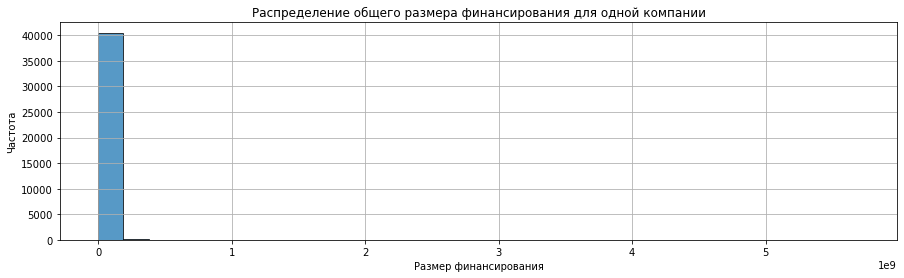

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
filtred_companies['funding_total'].plot(
                kind='hist', 
                bins=30, 
                alpha=0.75,
                edgecolor='black',
                rot=0, 
)

plt.title('Распределение общего размера финансирования для одной компании')
plt.xlabel('Размер финансирования')
plt.ylabel('Частота')
plt.grid()

plt.show()

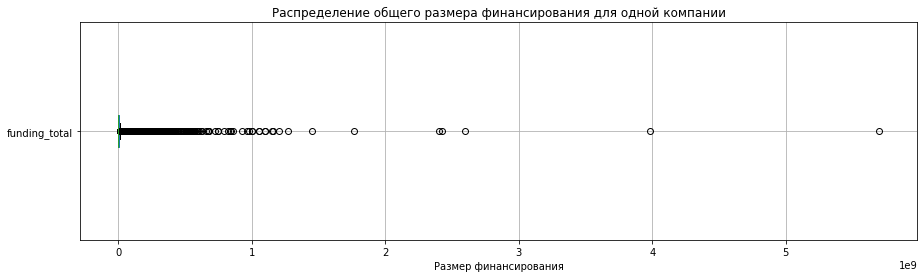

In [45]:
# Строим диаграмму размаха
plt.figure(figsize=(15, 4))
filtred_companies.boxplot(column='funding_total', vert=False)
plt.title('Распределение общего размера финансирования для одной компании')
plt.xlabel('Размер финансирования')
plt.show()

Графики получились ненаглядными из-за огромного размаха значений и большого количествоа выбросов, во много раз превышающих по размеру типичные значения. Попробуем отключить отображение выбросов на диаграмме и вывести основные статистические показатели методом describe().

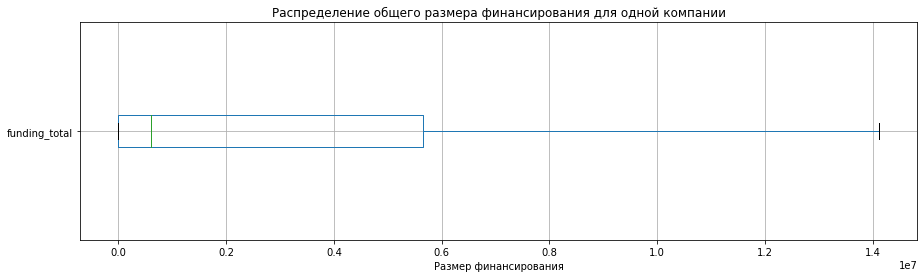

In [46]:
# Строим ту же диаграмму размаха с аргументом showfliers=False
plt.figure(figsize=(15, 4))
filtred_companies.boxplot(column='funding_total', vert=False, showfliers=False)
plt.title('Распределение общего размера финансирования для одной компании')
plt.xlabel('Размер финансирования')
plt.show()

In [47]:
#Посмотрим на основные статистические показатели с помощью метода describe() 
filtred_companies['funding_total'].describe().apply(lambda x: f'{x:.2f}')

count         40747.00
mean       10135609.64
std        56464359.98
min               0.00
25%               0.00
50%          600000.00
75%         5650650.00
max      5700000000.00
Name: funding_total, dtype: object

In [48]:
#Расчитаем верхнюю границу выбросов с помощью  межквартильного размаха IQR:
q_75 = filtred_companies['funding_total'].quantile(0.75)
q_25 = filtred_companies['funding_total'].quantile(0.25)
iqr = q_75 - q_25
upper_threshold = q_75 + (1.5*iqr)
display(upper_threshold)

14126625.0

Итак, наши данные имеют крайне нетипичное распредление. Графическим способом мы установили, что **наиболее типичные значения (в нашем случае 75% всех значений) размера общего финансирования для одной компании находятся в диапозоне от 0 до 5.65 млн.**, а **медиана находится на уровне  600 тыс.** При этом встречается большое количество выбросов, размеры которых могут превышать медиану почти в 10 тысяч раз (максимальное значение 5,7 млрд). В соответсвии с диаграммой размаха **выбивающимся размером общего финансирования компании будут все значения, превышающие 14 126 625 $ (верхняя граница усов)**. Однако, аномально большие суммы вполне могут быть реальными (если стартап перспективный и приносит высокую прибыль).

Из-за огромного разброса данных, а также из-за большого количества нулевых значений (более 25%) показатели, получаемые методом describe(), такие как: среднее, 25-процентиль не информативны. Чтобы убедится в том, что нулевое финансирование встречается чаще всего среди исследуемых стартапов, найдем значение моды.

In [49]:
#Найдем моду по столбцу funding_total
display(filtred_companies['funding_total'].mode())

#Найдем 30-процентиль по столбцу funding_total
display(filtred_companies['funding_total'].quantile(0.3))

0    0
dtype: int64

0.0

Как и ожидалось, значение 0 по столбцу 'funding_total' встречается чаще всего. Таким образом, к данным, где более 30% значений являются нулевыми, а максимальный размер параметра почти в тысячу раз превышает медиану, обычные способы нахождения типичных значений плохо применимы.


### 3.3. Куплены забесплатно?


Теперь отберем из нашей объединенной таблицы компании, которые были проданы за ноль или за один доллар, но имели ненулевой объём финансирования.

In [50]:
# Сохраняем условие отбора данных в переменную mask2
mask2 = ((analyzed_startups['funding_total'] > 0) & 
       ((analyzed_startups['price_amount'] == 0) | 
        (analyzed_startups['price_amount'] == 1)))

# Проводим логическую индексацию данных, новую таблицу сохраняем в переменной free_startups
free_startups = analyzed_startups[mask2].copy()
free_startups.head(10)

,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,status,milestones,funding_rounds,investment_rounds,funding_total,purchase_id,acquiring_company_id,term_code,price_amount,acquired_at
25,10054,Jumptap,mobile,2005-01-01,NaT,jumptap.com,jumptap,USA,acquired,3,7,0,121500000,9288.0,23283.0,cash_and_stock,0.0,2013-08-13
63,101312,SideTour,web,2011-06-01,NaT,sidetour.com,sidetour,USA,acquired,2,3,0,4000000,9653.0,11391.0,NaN,0.0,2013-09-18
66,101340,ChoicePass,enterprise,2011-07-01,NaT,choicepass.com,choicepass,USA,acquired,1,1,0,250000,7272.0,1972.0,NaN,0.0,2012-06-18
67,10137,Producteev,software,2008-07-08,NaT,producteev.com,producteev,USA,acquired,2,3,0,1310000,8254.0,757.0,cash_and_stock,0.0,2012-11-05
68,10139,TradeCard,enterprise,1999-01-01,NaT,tradecard.com,TradeCard,USA,acquired,1,2,0,44925000,9326.0,44008.0,NaN,0.0,2013-04-01
97,10179,GoodGuide,web,2007-12-01,NaT,goodguide.com,GoodGuide,USA,acquired,3,3,0,14230000,7502.0,167670.0,NaN,0.0,2012-08-09
112,10199,Where I've Been,travel,2007-06-08,NaT,whereivebeen.com,whereivebeen,USA,acquired,2,2,0,1750000,5783.0,1705.0,NaN,0.0,2011-07-11
114,10200,Swype,software,2002-01-01,NaT,swype.com,Swype,USA,acquired,3,5,0,13900000,6277.0,5473.0,NaN,0.0,2011-10-06
138,10252,Mob.ly,mobile,2007-10-01,NaT,mob.ly,NaN,USA,acquired,2,1,0,1100000,3204.0,11391.0,NaN,0.0,2010-05-05
150,10273,Angstro,software,2007-04-27,NaT,angstro.com,NaN,USA,acquired,0,1,0,225000,3782.0,59.0,NaN,0.0,2010-08-27


Посмотрим на основные статистические показатели по столбцу и рассчитаем верхнюю и нижнюю границу выбросов.

In [51]:
#Посмотрим на основные статистические показатели с помощью метода describe() 
free_startups['funding_total'].describe().apply(lambda x: f'{x:.2f}')

count          1618.00
mean       18152961.94
std       144503027.47
min            3750.00
25%         2000000.00
50%         6000000.00
75%        15500000.00
max      5700000000.00
Name: funding_total, dtype: object

In [52]:
#Посмотрим на стартап, получивыший максимальное финансирование
free_startups[free_startups['funding_total'] == 5700000000]

,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,status,milestones,funding_rounds,investment_rounds,funding_total,purchase_id,acquiring_company_id,term_code,price_amount,acquired_at
1346,13219,Clearwire,mobile,2003-10-01,NaT,clearwire.com,NaN,USA,acquired,2,4,0,5700000000,8023.0,3827.0,NaN,0.0,2012-12-17


In [53]:
#Расчитаем 75- и 25-процентиль, верхнюю и нижнюю границу выбросов с помощью  межквартильного размаха IQR:
free_q_75 = free_startups['funding_total'].quantile(0.75)
free_q_25 = free_startups['funding_total'].quantile(0.25)
fre_iqr = free_q_75 - free_q_25
upper_free_limit = free_q_75 + (1.5*fre_iqr)
lower_free_limit = free_q_25 - (1.5*fre_iqr)
print(f'Верхний порог выбросов равен {upper_free_limit}')
print(f'Нижний порог выбросов равен {lower_free_limit}')

Верхний порог выбросов равен 35750000.0
Нижний порог выбросов равен -18250000.0


В отфильтрованной таблице осталось 1618 записей,  которые удовлетворяют заданным условиям.

Как и в предыдущим задаче, данные имеют нетипичное распредление. Медиана находится на уровне 6 млн., а максимальное значение 5,7 млрд. превышает медиану почти в 1000 раз. В связи с эти среднее значение общей суммы финансирования не информативно, а стандартное отклоение в десятки раз превышает медиану и среднее. 

При расчете границ выбросов, когда к 75- и  25-процентилям соответсвенно добавляем и  вычитаем полуторный размер межквартильного размаха, нижняя граница ушла в область отрицательных значений, что заведомо неверно, т.к. в анализируемом столбце только неотрицательные значения. Подберем значение процентиля, которому будет соответсвовать верхняя граница, рассчитанная с коэффициэнтом 1,5.

In [54]:
# Подберем значение процентиля, которому будет соответсвовать верхняя граница, рассчитанная с коэффициэнтом 1,5.
free_startups['funding_total'].quantile(0.91)

35894000.00000001

Верхняя граница выбросов, рассчитанная стандартным способом, оказалась на уровне 91-процентиля, а значит примерно 9% данных должно попась в зону выбросов.

Это значит, что с таким распределением значений, стандартный расчет границ выбросов, будет некорректным: нижняя граница ушла в отрицательные значения, а верхняя - отсечет слишком большое количество значений, которые по факту не являются выбросами. Таким образом, коэффициент 1.5 необходимо будет скорректировать для более корректного определения границ выбросов. В нашем случае в качестве границ выбросов больше подойдут 1- и 98-процентили.

Таким образом, мы выяснили,  что 1618 были куплены забесплатно, при этом они имели финансирование. Наиболее типичный размер финансирования таких стартапов был на уровне 6 млн. долларов. Однако среди них встречаются стартапы с аномально большим финансированием до 5,7 млрд как у компании Clearwire. Стандартный расчет границ выбросов для такого разброса данных будет некорректным.


### 3.4. Цены стартапов по категориям

Составим топ категорий стратапов, которые могут быть наиболее привлекательными для крупных инвесторов.
Сгруппируем все компании по категориям и рассчитаем для каждой из них среднюю, масимальную и минимальные цены продажи, а также размах цен.

In [55]:
#Создадим сводную таблицу с категориями стартапов и их количеством, средним, минимальным и максимальным рейтингом:
pivot_startups = pd.pivot_table(
    analyzed_startups,
    index='category_code',
    values='price_amount',
    aggfunc=['count', 'mean', 'min', 'max']
)

In [56]:
#переименуем столбцы таблицы:
columns_names_startups = ['companies_count', 'mean_price', 'min_price', 'max_price']
pivot_startups.columns = columns_names_startups

#добавим столбец с размахом значений
pivot_startups['price_range'] = pivot_startups['max_price'] - pivot_startups['min_price']
pivot_startups = pivot_startups.sort_values(by='max_price', ascending=False)
#Отформатируем формат вывода значений
styled_pivot_startups = pivot_startups.style.format(
    {
        "mean_price": "{:.2f}",
        "min_price": "{:.2f}",
        "max_price": "{:.2f}",
        "price_range": "{:.2f}",
    }
)

#Выведем таблицу
display(styled_pivot_startups)

,companies_count,mean_price,min_price,max_price,price_range
category_code,,,,,
enterprise,412,6464338116.50,0.00,2600000000000.00,2600000000000.00
public_relations,219,615190296.80,0.00,39000000000.00,39000000000.00
biotech,454,426312140.97,0.00,20000000000.00,20000000000.00
other,315,141005890.48,0.00,18400000000.00,18400000000.00
mobile,418,98783473.68,0.00,12500000000.00,12500000000.00
software,1455,108229491.93,0.00,10200000000.00,10200000000.00
games_video,344,114077125.17,0.00,10000000000.00,10000000000.00
security,131,165681297.71,0.00,7680000000.00,7680000000.00
real_estate,7,1256142857.14,0.00,6850000000.00,6850000000.00


В сводной таблице 41 категория компаний. Минимальная цена покупки практически для всех категорий - 0$. Исключением является единственная компания в категории нанотехнологий, для нее цена покупки пройдет сразу по нескольким столбцам со средним, минимальным и максимальным значениями.  

Выведем среди полученных категорий топ компаний с самыми высокими ценами, рассчитанными как средняя цена продажи в категории (т.к. для большинства компаний размах и максимальная цена будут совпадать из-за минимальных нулевых значений), и компаний с самым большим размахом цен, рассчитанными как разница между минимальными и максимальными ценами.

Ориентируясь на столбец с максималльной ценой, выделим топ-7 компаний или максимальной стоимостью более 10 млрд.$, т.к. далее размеры максимальных значений в категориях  идут довольно близко друг к другу.

category_code
enterprise          6464338116.50
automotive          1528600000.00
real_estate         1256142857.14
public_relations     615190296.80
manufacturing        589272426.66
nanotech             584000000.00
biotech              426312140.97
Name: mean_price, dtype: object

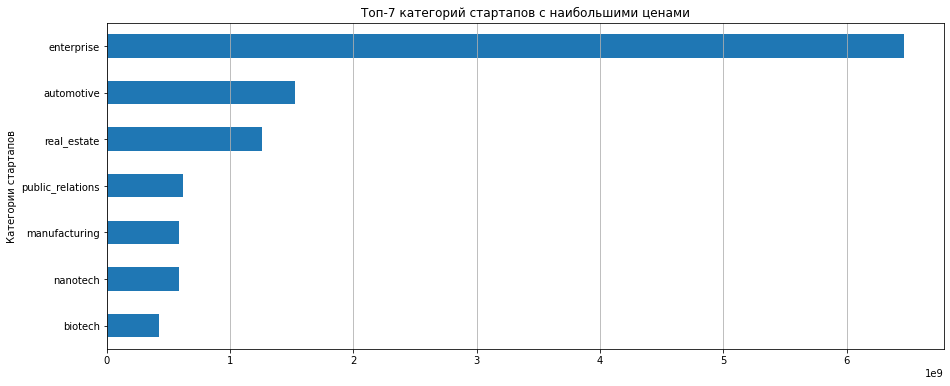

In [57]:
#Находим топ-7 самых категорий с смамыми дорогими ценами продажи компаний на основе среднего значения цены в категории
mean_price = pivot_startups['mean_price'].sort_values(ascending=False).head(7)
display(mean_price.apply(lambda x: f'{x:.2f}'))

#Построим линейчатую диаграмму с топом-7 категорий с наибольшими ценами
mean_price = mean_price.sort_values()
mean_price.plot(kind='barh',
               title= 'Топ-7 категорий стартапов с наибольшими ценами',
               legend=False,
               ylabel='Средняя стоимость компаний',
               xlabel='Категории стартапов',
               rot=0,
               figsize=(15, 6))
plt.grid(axis='x')
plt.show()

category_code
enterprise          2600000000000.00
public_relations      39000000000.00
biotech               20000000000.00
other                 18400000000.00
mobile                12500000000.00
software              10200000000.00
games_video           10000000000.00
Name: price_range, dtype: object

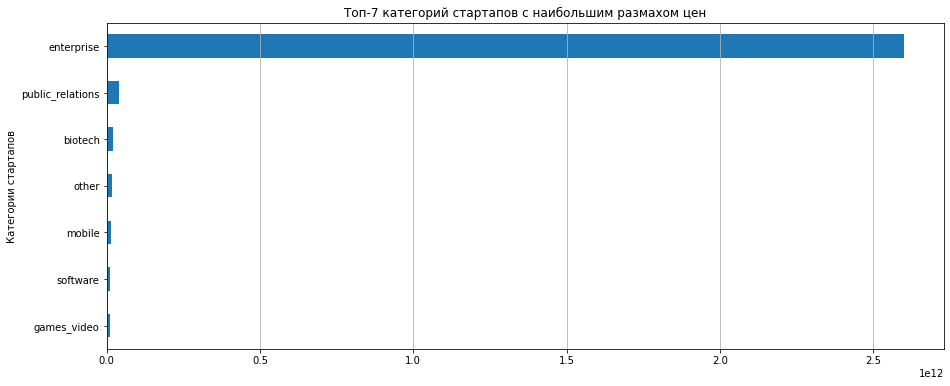

In [58]:
#Находим топ-7 самых категорий с самым большим размахом цен внутри категории:
price_range = pivot_startups['price_range'].sort_values(ascending=False).head(7)
display(price_range.apply(lambda x: f'{x:.2f}'))

#Построим линейчатую диаграмму с топом-7 категорий с наибольшим размахом цен
price_range = price_range.sort_values()
price_range.plot(kind='barh',
               title= 'Топ-7 категорий стартапов с наибольшим размахом цен',
               legend=False,
               ylabel='Размах цен внутри категории',
               xlabel='Категории стартапов',
               rot=0,
               figsize=(15, 6))
plt.grid(axis='x')
plt.show()

Таким образом безусловным лидером среди самых привлекательных для инвестиций категорий стартапов оказлась промышленность (enterprise), очевидно что лидерство в обоих топах обеспечила категории самая дорогостоящая компания, попавшая в датасет.
Также к числу перспективных категорий для инвестирования попали: связи с общественностью (public_relations), биотехнологии (biotech), нанотехнологии (nanotech), автомобильная категория (automotive), недвижимость(real_estate), производство (manufacturing), мобильная связь (mobile), программное обеспечение (software),  видеоигры (games_video) и категория "другое".


### 3.5. Сколько раундов продержится стартап перед покупкой

Выделим типичное количество раундов для каждого возможного статуса стартапа. Всего в данных встречается 4 статуса: acquired - приобретенный, closed - закрытый, ipo -  первичное публичное размещение, operating - работающий.
Сначала посмотрим на разброс значений в столбце funding_rounds c помощью метода describe().

In [59]:
display(analyzed_startups['funding_rounds'].describe())

count    40890.000000
mean         1.289313
std          1.264921
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

Для большинства компаний наиболее типичным количеством раундов является 1, однако максимальное значение достигает 15.
Посмотрим есть ли отличия в зависимости от статуса стартапа.

Для этого сгруппируем данные по статусу стартапа и выведем медиану для каждого из них. 

status
acquired     0.0
closed       1.0
ipo          1.0
operating    1.0
Name: funding_rounds, dtype: float64

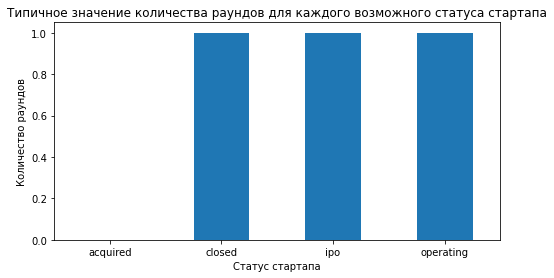

In [60]:
#Группируем данные по статусам компании и рассчитыываем для каждого медиану по количеству раундов
typical_funding_rounds = analyzed_startups.groupby('status')['funding_rounds'].median()
display(typical_funding_rounds)

#строим график на основе полученных данных
typical_funding_rounds.plot(kind='bar',
               title= 'Типичное значение количества раундов для каждого возможного статуса стартапа',
               legend=False,
               ylabel='Количество раундов',
               xlabel='Статус стартапа',
               rot=0,
               figsize=(8, 4))

plt.show()

Наиболее типичное количество раундов финансирования для всех статусов, кроме acquired, равно единице. Для acquired типичное значение равно 0. Для более детального изучения вопроса посмотрим на среднее (среднеарифметическое) значение раундов для разных статусов.

status
acquired     0.525532
closed       1.381453
ipo          1.934375
operating    1.522658
Name: funding_rounds, dtype: float64

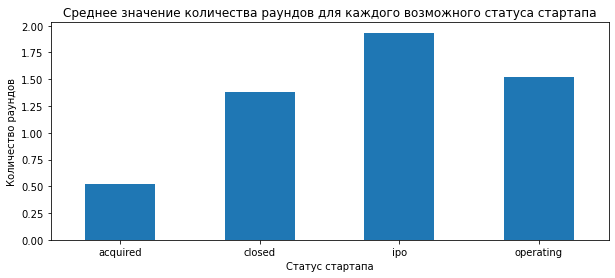

In [61]:
#Группируем данные по статусам компании и рассчитыываем для каждого медиану по количеству раундов
mean_funding_rounds = analyzed_startups.groupby('status')['funding_rounds'].mean()
display(mean_funding_rounds)

#строим график на основе полученных данных
mean_funding_rounds.plot(kind='bar',
               title= 'Среднее значение количества раундов для каждого возможного статуса стартапа',
               legend=False,
               ylabel='Количество раундов',
               xlabel='Статус стартапа',
               rot=0,
               figsize=(10, 4))

plt.show()

Картина немного изменилась и мы видим, что среднее количество раундов финансирования для компаний со статусом ipo, выше, чем у остальных и почти равно 2, видимо здесь на отклонение среднего значения от медианы повлияли компании, для которых количество раундов финанситрования было значительно выше типичного (максимальное количиство зафиксировано на отметке 15).
Для статуса acquired значение равно 0,52, значит эти стартапы перед покупкой чаще всего либо не финанситруются совсем, либо винансируются 1 раз.

Таким образом, делаем вывод, что наиболее типичное количество раундов финансирования для стартапов со статусами: closed, ipo, operating равно 1, при этом  стартапы в статусе "первичное публичное размещение" в среднем проходят больше раундов финансиирования, чем остальные стартапы. Для статуса acquired типичное значение равно 0, значит эти стартапы чаще всего покупаются, так и не получив финансирования.

Посмотрим теперь отличается ли типичная цена компаний, которые были проданы за ненулевую стоимость,  в зависимости от количества пройденных раундов финансирования.

In [62]:
# Отбираем компании по статусу 'acquired', имеющие значение цены продажи
sold_companies = analyzed_startups[
    (analyzed_startups["status"] == "acquired")
    & (analyzed_startups["price_amount"] > 0)
].copy()
sold_companies.head()


,company_id,name,category_code,founded_at,closed_at,domain,network_username,country_code,status,milestones,funding_rounds,investment_rounds,funding_total,purchase_id,acquiring_company_id,term_code,price_amount,acquired_at
1,10,Flektor,games_video,NaT,NaT,flektor.com,NaN,USA,acquired,0,0,0,0,1.0,11.0,NaN,20000000.0,2007-05-30
3,1001,FriendFeed,web,2007-10-01,NaT,friendfeed.com,friendfeed,USA,acquired,3,1,0,5000000,1901.0,5.0,cash_and_stock,47500000.0,2009-08-10
32,1007,Rupture,games_video,NaT,NaT,rupture.com,rupture,USA,acquired,2,1,0,3000000,2186.0,851.0,cash,15000000.0,2008-05-08
77,101519,Vidacare,hardware,NaT,NaT,vidacare.com,NaN,USA,acquired,0,1,0,274999,10214.0,65984.0,NaN,262500000.0,2013-10-29
83,10158,StudioNow,photo_video,2007-01-01,NaT,studionow.com,NaN,USA,acquired,1,3,0,15286400,2923.0,351.0,cash_and_stock,36500000.0,2010-01-25


In [63]:
sold_companies.groupby("funding_rounds").agg({"company_id": "count", "price_amount": "median"})

,company_id,price_amount
funding_rounds,,
0,1688,43000000.0
1,353,66200000.0
2,196,75000000.0
3,127,82000000.0
4,57,180000000.0
5,24,169500000.0
6,15,160000000.0
7,8,220000000.0
8,4,402000000.0


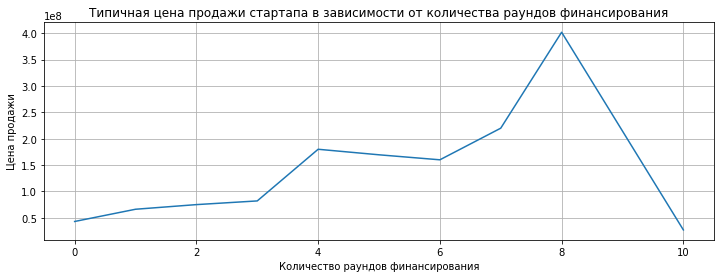

In [64]:
# Сбрасываем индексы у сводной таблицы
sold_companies_price = sold_companies.groupby("funding_rounds")["price_amount"].median()
# Строим линейный график
sold_companies_price.plot(
    kind="line",
    x="funding_rounds",
    y="price_amount",
    title="Типичная цена продажи стартапа в зависимости от количества раундов финансирования",
    figsize=(12, 4),
)

# Подписываем и отображаем график
plt.xlabel("Количество раундов финансирования")
plt.ylabel("Цена продажи")
plt.grid()
plt.show()

На графике прослеживается явная зависимость цены продажи компании от количества раундов финансирования, чем чаще компания финансировалась, тем дороже потом была продана. Компания, прошедшая 10 раундов финансирования, поэтому ее цену продажи нельзя считать показательной.

[*К содержанию*](#intro) 


## 4. Итоговый вывод и рекомендации<a id='4'></a>


В ходе проекта были проанализированы 5 датасетов, содержащих информацию о стартапах, их финансировании и сотрудниках. 
Была проведена следующая работа:
- загружены данные 7 датасетов, проведено ознакомление с их содеражанием;
- данные датасетов были подготовлены анализу: названия столбцов приведены к единому стилю, оптимизированы типы данных;
- проанализированы пропуски в данных, сделаны предварительные выводы о причинах их возникновения и о влиянии на дальнейший ход работы;
- проанализирована динамика по годам  количества раундов и типичного размера средств в рамках одного раунда финансирования;
- проанализирована полнота сведений об образовании сотрудников, и ее зависимость от размера компаний;
- определены столбцы, по которым можно объединять данные из разных таблиц;
- проведено преобразование основного дтасета company_and_rounds.csv к виду, наиболее удобному для проведения анализа в разрезе отдельных компаний;
- объединены таблицы с данными о компаниях и покупках, отобраны компании, которые имели хотя бы 1 раунд финансирования или инвестирования, а также те, которые были проданы;
- проанализирован типичный размер средств, который предоставлялся компаниям, а также выбросы по данному показателю;
- рассмотрены компании, которые были проданы за ноль или за один доллар, но при этом получали финансирование, сделаны выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов;
- выделены категории стартапов с наибольшими ценами и значительным разбросом цен, которые могут быть наиболее привлекательными для крупных инвесторов;
- проанализировано типичное значение количества раундов для каждого возможного статуса стартапа.


#### Основные выводы

1) Предоставленные данные имеют неполный характер. Так, для большей части компаний нет более подробной информации о раундах финансирования, отсюда более 75% пропусков в изначальном датасете, а в информации о сотрудниках есть привязка к конкретным компаниям только у 15% записей. Кроме того, в датасетах много выбросов в данных о финансировании и стоимости покупки, а также противоречивой информации. Так, в исходных данных у 1618 компаний стоит нулевая стоимость продажи, при этом имеются данные о финансировании, порой в очень больших размерах, что создает явное противоречие. Поэтому к выводам, сделанным на основе полученной информации стоит относится максимально аккуратно. 

2) Активное финансирование стартапов можно наблюдать с 1999г, а начиная с 2002, количество финансирований ежегодно увеличивается. При этом типичный размер собранных в рамках одного раунда средств достиг своего пика в 2005г, после этого размер финансирования в рамках раунда уменьшался с каждым годом. В 2013г. снова начала прослеживаться тенденция  на рост размеров финансирования при сохранении роста количества раундов.

3) По имеющимся данным можно отследить зависимость, что крупные компании-стартапы прдоставляют более полную информацию о своих сотрудниках. Однако их количество крайне мало, а информация носит неполный характер. Поэтому этот вывод требует подверждения на более широкой выборке.

4) Размер общего финансирования кампаний-стартапов находятся как правило в диапозоне от 0 до 5.65 млн. долларов, при этом наиболее типичный размер равен 600 тысячам. Однако, размеры финансирования имеют очень большой размах и  могут достигать огромных значений (максимальное в наших данных 5,7 млрд. долларов). Более чем в 30% случаев стартапы имеют нулевой размер финансирования.

5) Так как данные о финансировании имеют очень большой размах и большое количество нулевых значений, стандартные расчеты статистических параметров, в том числе выбросов, будут некорректными, следует подбирать границы выбросов, опираясь на индивидуально подобранные для данных процентили.

6) Наиболее привлекательными для инвестиций категориями стартапов, отобранными на основе самых высоких цен продажи и самом большом размахе цен, оказлась промышленность (enterprise), связи с общественностью (public_relations), биотехнологии (biotech), нанотехнологии (nanotech), автомобильная промышленность (automotive), недвижимость(real_estate), производство (manufacturing), мобильная связь (mobile), программное обеспечение (software) и видеоигры (games_video). Максимальные цены продажи команий, судя по предоставленным данным, в этих категориях достигают 2,6 трлн. долларов, а средние цены колеблюся от 114 млн. до 6,5млрд. долларов.

7) Наиболее типичное количество раундов финансирования для стартапов со статусами: closed, ipo, operating равно 1, при этом стартапы в статусе "первичное публичное размещение" в среднем проходят больше раундов финансиирования. Приобретенные (acquired) же  стартапы, чаще всего продаются, так и не получив финансирования.

8) На основе ненулевых сделок о продаже можно сделать вывод о том, что чем больше раундов финансирования прошла компания, тем выше становится ее цена.

#### Рекомендации

Для более глубокого и детального изучения изучения вопроса инвестирования стартапов и надежности выводов, данные следует дополнить и проверить на истинность аномальные значения: в частности суммы финансирования и цены продажи с аномально большими значениями, а также сделки о продаже компаний с нулевой стоимостью. 

Однако, опираясь на те данные, которые имеются в распоряжении, можно рекомендовать обратить внимание на отрасли, имеющие наиболее крупные размеры сделок и  разброс цен за стартап:  промышленность, связи с общественностью, биотехнологии, нанотехнологии, автомобильная промышленность, недвижимость, производство, мобильная связь, программное обеспечение, видеоигры.

Также стоит учитывать при решении вопросов об инвестировании в стартапы, что количество раундов финансирования как правило увеличивает цену стартапов.

[*К содержанию*](#intro) 